# Breast Histopathology Images

In [49]:
import os
import zipfile
import random
import shutil
import glob
import numpy as np
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from PIL import Image

## Pre-procesamiento

In [2]:
breast_imgs = glob.glob('breast-histopathology-images/IDC_regular_ps50_idx5/**/**.png', recursive = True)

In [3]:
for imgname in breast_imgs[:5]:
    print(imgname)    

breast-histopathology-images/IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1001_class0.png
breast-histopathology-images/IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1051_class0.png
breast-histopathology-images/IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1101_class0.png
breast-histopathology-images/IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1151_class0.png
breast-histopathology-images/IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1201_class0.png


Si dejamos "shutil.copy" crearemos un duplicado de las imágenes en las carpetas especificadas, lo cual no es recomendable correr si ya lo hicimos una vez

In [6]:
non_cancer_imgs = []
cancer_imgs = []

for img in breast_imgs:
    if img[-5] == '0':
        non_cancer_imgs.append(img)
    elif img[-5] == '1':
        cancer_imgs.append(img)

# Seleccionar una muestra equilibrada de imágenes sin cáncer
random.seed(1)
non_cancer_sample = random.sample(non_cancer_imgs, min(len(non_cancer_imgs), 88786))

non_cancer_num = len(non_cancer_sample)
cancer_num = len(cancer_imgs) 
total_img_num = non_cancer_num + cancer_num

# Mostrar 
print('Número de imágenes sin cáncer: {}'.format(non_cancer_num))
print('Número de imágenes con cáncer: {}'.format(cancer_num))
print('Total de imágenes: {}'.format(total_img_num))



Número de imágenes sin cáncer: 88786
Número de imágenes con cáncer: 78786
Total de imágenes: 167572


In [35]:
carpeta_nocancer = 'no-cancer/'

for img in non_cancer_sample:
    shutil.copy(img, carpeta_nocancer)


In [7]:
carpeta_cancer = 'cancer/'

for img in cancer_imgs:
    shutil.copy(img, carpeta_cancer)


In [29]:
imagenes_carpeta_cancer = glob.glob('cancer/**.png', recursive = True)
imagenes_carpeta_nocancer = glob.glob('no-cancer/**.png', recursive = True)

print('Imágenes de carpeta cancer: {}' .format(len(imagenes_carpeta_cancer)))
print('Imágenes de carpeta no-cancer: {}' .format(len(imagenes_carpeta_nocancer)))

Imágenes de carpeta cancer: 88786
Imágenes de carpeta no-cancer: 88786


In [19]:
random.seed(1)
cancer_sample = random.sample(cancer_imgs, 11214)
# Configuración del generador de datos
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
# Generar imágenes aumentadas y guardarlas en el directorio de salida
for img_path in cancer_sample:
    img = Image.open(img_path)  
    img = img.resize((50, 50))  
    img_array = np.array(img)
    img_array = img_array.reshape((1,) + img_array.shape)

    i = 0
    for batch in datagen.flow(img_array, batch_size=1, 
                              save_to_dir=carpeta_cancer, 
                              save_prefix='mod',
                              save_format='png'):
        i += 1
        if i >= 5:  
            break

print(f"Imágenes aumentadas guardadas en {carpeta_cancer}")

Imágenes aumentadas guardadas en cancer/


In [25]:
imagenes_carpeta_cancer = glob.glob('cancer/**.png', recursive = True)

print('Imágenes de carpeta cancer: {}' .format(len(imagenes_carpeta_cancer)))


Imágenes de carpeta cancer: 88786


In [40]:

non_cancer_num = len(non_cancer_imgs)  # No cancer
cancer_num = len(cancer_imgs)   # Cancer 
        
total_img_num = non_cancer_num + cancer_num
        
print('Número de imágenes sin cancer: {}' .format(non_cancer_num))   # images of Non cancer
print('Número de imágenes cancer : {}' .format(cancer_num))   # images of cancer 
print('Total de imágenes : {}' .format(total_img_num))

Número de imágenes sin cancer: 198738
Número de imágenes cancer : 78786
Total de imágenes : 277524


In [41]:
carpeta_nocancer = 'no-cancer/'
carpeta_cancer = 'cancer/'
entrenamiento_cancer = 'entrenamiento/cancer/'
entrenamiento_nocancer = 'entrenamiento/nocancer/'
test_cancer = 'test/cancer/'
test_nocancer = 'test/nocancer/'

In [42]:

def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[:testing_length]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)

Separamos los datos (imágenes) para entrenamiento y para test. Solo hacerlo una vez

In [43]:
split_size = .8
random.seed(1)
split_data(carpeta_cancer, entrenamiento_cancer, test_cancer, split_size)
split_data(carpeta_nocancer, entrenamiento_nocancer, test_nocancer, split_size)

In [44]:
entrenamiento_cancer = 'entrenamiento/cancer/'
entrenamiento_nocancer = 'entrenamiento/nocancer/'
test_cancer = 'test/cancer/'
test_nocancer = 'test/nocancer/'

datos_entrenamiento_cancer = glob.glob('entrenamiento/cancer/**.png', recursive = True)
datos_entrenamiento_nocancer = glob.glob('entrenamiento/nocancer/**.png', recursive = True)
datos_test_cancer = glob.glob('test/cancer/**.png', recursive = True)
datos_test_nocancer = glob.glob('test/nocancer/**.png', recursive = True)


print('Imágenes de entrenamiento sin cancer: {}' .format(len(datos_entrenamiento_cancer)))
print('Imágenes de entrenamiento con cancer: {}' .format(len(datos_entrenamiento_nocancer)))
print('Imágenes de entrenamiento total: {}' .format(len(datos_entrenamiento_nocancer)+len(datos_entrenamiento_cancer)))
print('Imágenes de test sin cancer: {}' .format(len(datos_test_cancer)))
print('Imágenes de test con cancer: {}' .format(len(datos_test_nocancer)))
print('Imágenes de test total: {}' .format(len(datos_test_nocancer)+len(datos_test_cancer)))

Imágenes de entrenamiento sin cancer: 71028
Imágenes de entrenamiento con cancer: 71028
Imágenes de entrenamiento total: 142056
Imágenes de test sin cancer: 17758
Imágenes de test con cancer: 17758
Imágenes de test total: 35516


## RNC
Las imágenes proporcionadas en https://www.kaggle.com/datasets/paultimothymooney/breast-histopathology-images/data tienen una dimensión de 50x50 y están a color (RGB). 

In [52]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(50, 50, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [45]:
TRAINING_DIR = "entrenamiento/"

train_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=100,
                                                    class_mode='binary',
                                                    target_size=(50, 50))

VALIDATION_DIR = "test/"

validation_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=100,
                                                              class_mode='binary',
                                                              target_size=(50, 50))

Found 142056 images belonging to 2 classes.
Found 35516 images belonging to 2 classes.


In [46]:
total_muestras = len(train_generator)  
tamano_lote = train_generator.batch_size
numero_de_lotes = total_muestras // tamano_lote
print(total_muestras)
print(tamano_lote)
print(numero_de_lotes)

1421
100
14


In [53]:
checkpoint = ModelCheckpoint('pesos_del_modelo_epoch_{epoch:02d}.h5', 
                             save_weights_only=True, 
                             save_best_only=False)

In [54]:
history = model.fit(train_generator,
                              steps_per_epoch= 100,
                              epochs=15,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks=checkpoint)

Epoch 1/15
100/100 [==============================] - 157s 2s/step - loss: 0.6474 - accuracy: 0.6114 - val_loss: 0.5653 - val_accuracy: 0.7268
Epoch 2/15
100/100 [==============================] - 66s 665ms/step - loss: 0.5670 - accuracy: 0.7213 - val_loss: 0.6130 - val_accuracy: 0.6836
Epoch 3/15
100/100 [==============================] - 65s 649ms/step - loss: 0.5387 - accuracy: 0.7529 - val_loss: 0.5436 - val_accuracy: 0.7305
Epoch 4/15
100/100 [==============================] - 63s 630ms/step - loss: 0.5201 - accuracy: 0.7570 - val_loss: 0.5207 - val_accuracy: 0.7513
Epoch 5/15
100/100 [==============================] - 62s 622ms/step - loss: 0.5128 - accuracy: 0.7630 - val_loss: 0.4741 - val_accuracy: 0.7900
Epoch 6/15
100/100 [==============================] - 60s 605ms/step - loss: 0.5082 - accuracy: 0.7611 - val_loss: 0.4740 - val_accuracy: 0.7818
Epoch 7/15
100/100 [==============================] - 61s 617ms/step - loss: 0.4946 - accuracy: 0.7724 - val_loss: 0.4974 - val_accu

In [55]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs


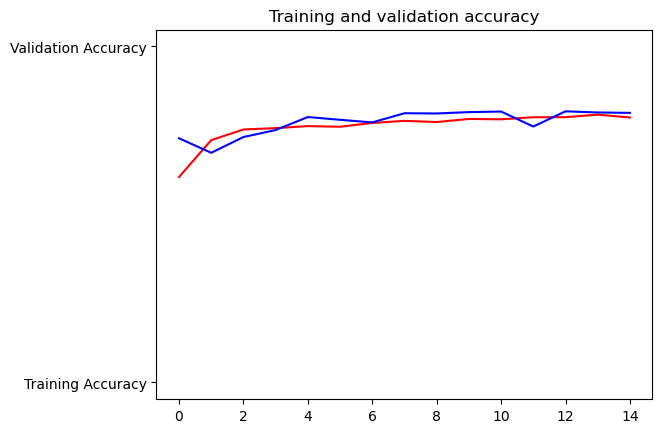

In [56]:
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()


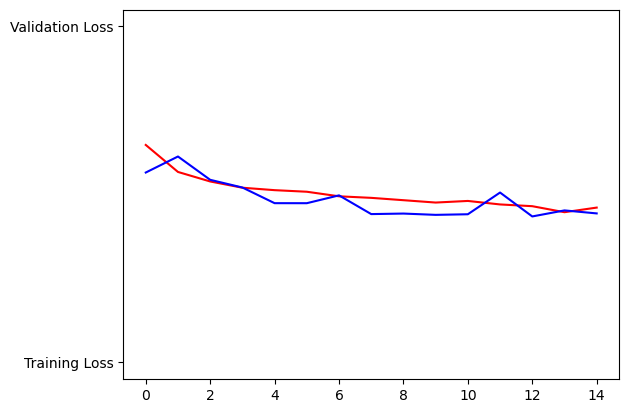

In [57]:
#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()
# Desired output. Charts with training and validation metrics. No crash :)

In [58]:
checkpoint2 = ModelCheckpoint('pesos_del_modelo2_epoch_{epoch:02d}.h5', 
                             save_weights_only=True, 
                             save_best_only=False)

In [59]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5, 5), activation='relu', input_shape=(50, 50, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model2.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [60]:
history2 = model2.fit(train_generator,
                              steps_per_epoch= 100,
                              epochs=15,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks=checkpoint2)

Epoch 1/15
100/100 [==============================] - 58s 574ms/step - loss: 0.6875 - accuracy: 0.5667 - val_loss: 0.6302 - val_accuracy: 0.7107
Epoch 2/15
100/100 [==============================] - 58s 579ms/step - loss: 0.6249 - accuracy: 0.6795 - val_loss: 0.5473 - val_accuracy: 0.7396
Epoch 3/15
100/100 [==============================] - 57s 575ms/step - loss: 0.5917 - accuracy: 0.7069 - val_loss: 0.5748 - val_accuracy: 0.7140
Epoch 4/15
100/100 [==============================] - 57s 573ms/step - loss: 0.5779 - accuracy: 0.7199 - val_loss: 0.6238 - val_accuracy: 0.6686
Epoch 5/15
100/100 [==============================] - 56s 566ms/step - loss: 0.5749 - accuracy: 0.7160 - val_loss: 0.5773 - val_accuracy: 0.6793
Epoch 6/15
100/100 [==============================] - 56s 564ms/step - loss: 0.5692 - accuracy: 0.7204 - val_loss: 0.5468 - val_accuracy: 0.7433
Epoch 7/15
100/100 [==============================] - 57s 570ms/step - loss: 0.5411 - accuracy: 0.7435 - val_loss: 0.4852 - val_ac

In [63]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc2=history2.history['accuracy']
val_acc2=history2.history['val_accuracy']
loss2=history2.history['loss']
val_loss2=history2.history['val_loss']

epochs2=range(len(acc)) # Get number of epochs


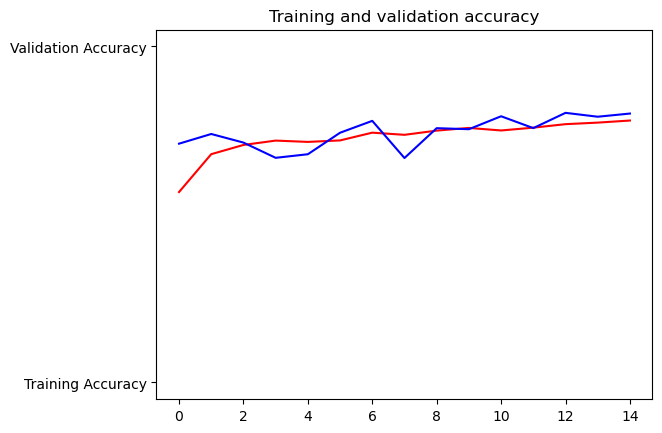

In [64]:
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs2, acc2, 'r', "Training Accuracy")
plt.plot(epochs2, val_acc2, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()


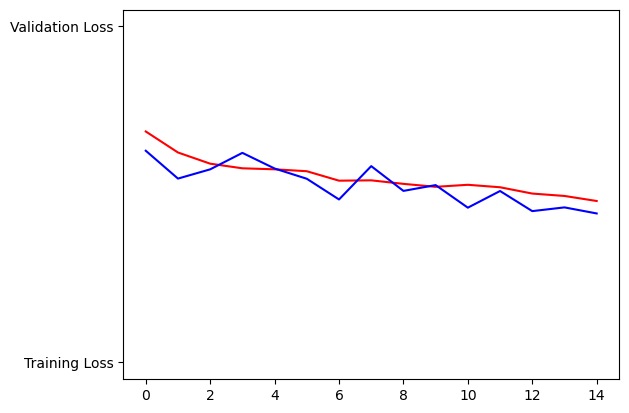

In [65]:
#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs2, loss2, 'r', "Training Loss")
plt.plot(epochs2, val_loss2, 'b', "Validation Loss")
plt.show()
# Desired output. Charts with training and validation metrics. No crash :)

## Matriz de confusión 